<h2>Healthcare</h2>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from scipy import stats

In [3]:
insurance=pd.read_csv('insurance.csv')
insurance.info()
insurance.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [4]:
print('sex\n',insurance['sex'].value_counts())
print('-'*50)
print('smoker\n',insurance['smoker'].value_counts())
print('-'*50)
print('region\n',insurance['region'].value_counts())



sex
 male      676
female    662
Name: sex, dtype: int64
--------------------------------------------------
smoker
 no     1064
yes     274
Name: smoker, dtype: int64
--------------------------------------------------
region
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<h> <b> Check for missing values </h></b>

In [118]:
insurance.isnull().values.any()
print('There are no missing values')

There are no missing values


<h2> 5 point summary of the numerical attributes </h2>

In [120]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<h2> Distribution of ‘bmi’, ‘age’ and ‘charges’ columns </h2>

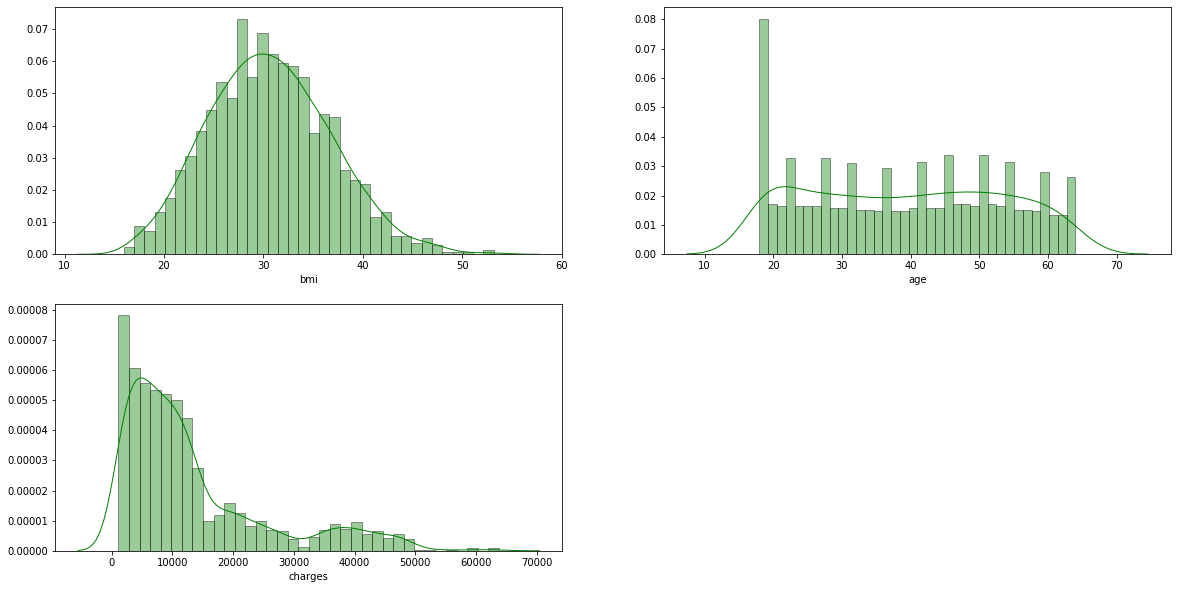

In [7]:
def plot(columns):
    plt.figure(figsize=(20,10))
    for i,column in enumerate(columns):
        column,slot=columns[i],i+1
        plt.subplot(2,2,slot)
        sns.distplot(insurance[column], hist=True, kde=True,bins=int(180/5), color = 'green',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1})
        plt.xlabel(column)
columns=['bmi','age','charges']
plot(columns)



<h2> Measure of Skewness </h2>

In [121]:
#Skew = 3 * (Mean – Median) / Standard Deviation
insurance[['age','bmi','charges']].skew(axis = 0, skipna = True)

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

<h2> Detecting outliers - Z score method </h2>

In [122]:
def detect_outiers(column):
    outliers=[]
    threshold=3
    z=stats.zscore(insurance[column].values)
    for i,value in enumerate(z):
        if np.abs(value)>threshold:
            outliers.append((insurance[column].values)[i])
    return outliers

features=['age','bmi','charges']
for feature in features:
          outliers=detect_outiers(feature)
          if (len(outliers)) >1:
              print(feature,'has outliers',outliers)
          else:
              print(feature,'has no outliers')      
          
          

age has no outliers
bmi has outliers [49.06, 50.38, 52.58, 53.13]
charges has outliers [51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


<h2> Distribution of categorical columns (include children) </h2>

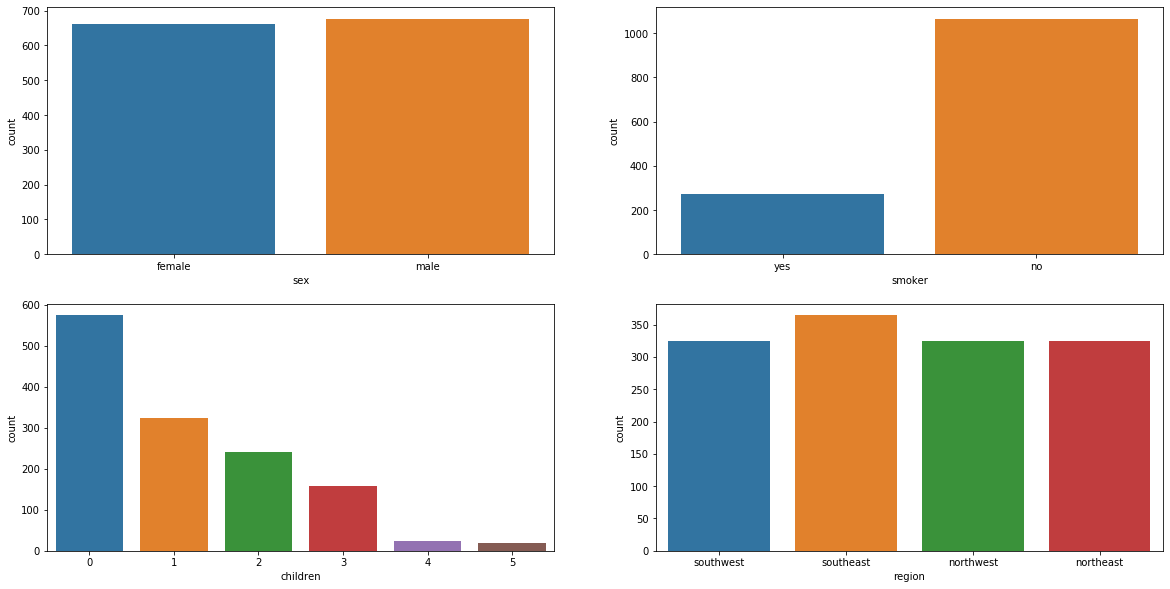

In [126]:
def plot(columns):
    plt.figure(figsize=(20,10))
    for i,column in enumerate(columns):
        column,slot=columns[i],i+1
        plt.subplot(2,2,slot)
        sns.countplot(x=insurance[column],data=insurance)
        plt.xlabel(column)
columns=['sex','smoker','children','region']
plot(columns)

<h2> Pair plot </h2>

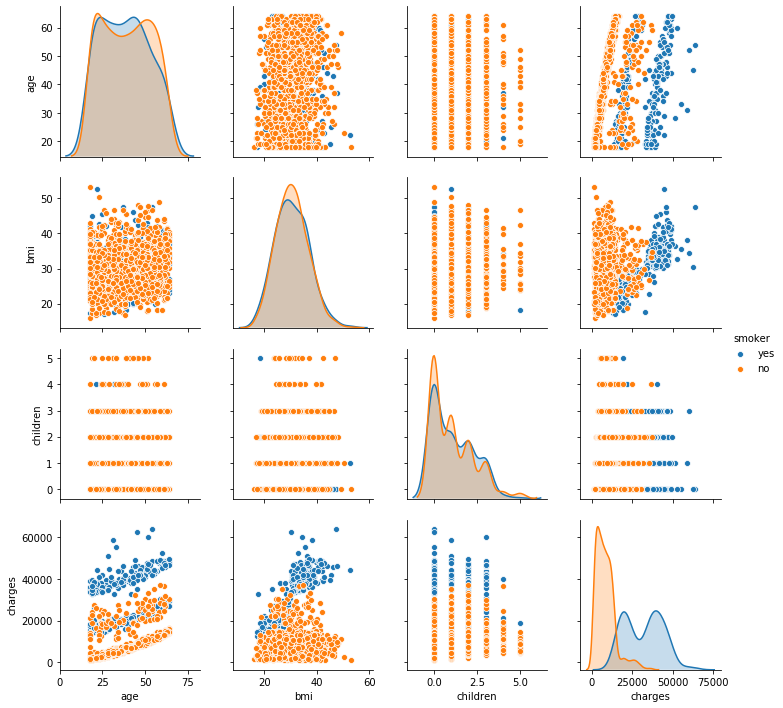

In [129]:
sns.pairplot(insurance[['age','sex','bmi','children','smoker','region','charges']],hue="smoker")

<h2> does charges for smoker differ significantly ?</h2>

In [130]:
smoker=insurance[insurance['smoker']=='yes']
non_smoker=insurance[insurance['smoker']=='no']
#shapiro test
stat,p=stats.shapiro(insurance['charges'])
if p <0.05:
    print('data is not normal')
else:
    print('data is normal')

#stats.ttest_ind(smoker['charges'],non_smoker['charges'])

stat,p=stats.mannwhitneyu(non_smoker['charges'],smoker['charges'])
if p <0.05:
    print('since p value is less than 0.05 the distrubution does differ significantly')

data is not normal
since p value is less than 0.05 the distrubution does differ significantly


<h2>Does bmi of males differ significantly from that of
females ?</h2>

In [131]:
male_bmi=insurance[insurance['sex']=='male']
female_bmi=insurance[insurance['sex']=='female']
#shapiro test
stat,p=stats.shapiro(insurance['bmi'])

if p <0.05:
    print('data is not normal')
else:
    print('data is normal')
stat,p=stats.mannwhitneyu(male_bmi['bmi'],female_bmi['bmi'])

if p <0.05:
    print('since p value is less than 0.05 the distrubution does differ significantly')
else:
    print('since p value is greater than 0.05 the distrubution does not differ significantly')


data is not normal
since p value is greater than 0.05 the distrubution does not differ significantly


<h2> Is the proportion of smokers significantly different in different genders? </h2>

In [132]:
data=pd.crosstab(insurance['sex'],insurance['smoker'])
print(data)
chi2, p, dof, ex=stats.chi2_contingency(data)
if p <0.05:
    print('since p value is less than 0.05 the distrubution does differ significantly')
else:
    print('since p value is greater than 0.05 the distrubution does not differ significantly')


smoker   no  yes
sex             
female  547  115
male    517  159
since p value is less than 0.05 the distrubution does differ significantly


<h2> Is the distribution of bmi across women with no children, one child and two children, the same ? </h2>

In [134]:
female=insurance[insurance['sex']=='female']
child_0=female['bmi'][female['children']==0]
child_1=female['bmi'][female['children']==1]
child_2=female['bmi'][female['children']==2]
child_3=female['bmi'][female['children']==3]
child_4=female['bmi'][female['children']==4]
child_5=female['bmi'][female['children']==5]

stat,p=stats.kruskal(child_0,child_1,child_2,child_3,child_4,child_5)
if p <0.05:
    print('since p value is less than 0.05 the distrubution does differ significantly')
else:
    print('since p value is greater than 0.05 the distrubution does not differ significantly')

since p value is greater than 0.05 the distrubution does not differ significantly
